In [1]:
import pandas as pd 
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is A4B9-8E3D

 Directory of C:\Users\Sergi\OneDrive\Documents\GitHub\sergiguasch\projects\getafix

01/24/2022  08:31 PM    <DIR>          .
01/24/2022  03:30 PM    <DIR>          ..
01/24/2022  03:31 PM    <DIR>          .ipynb_checkpoints
10/04/2019  10:08 PM        26,925,500 alldata.csv
10/04/2019  10:08 PM         1,240,633 fulltimeAL.csv
01/24/2022  08:31 PM           140,581 Getafix.ipynb
               3 File(s)     28,306,714 bytes
               3 Dir(s)  337,009,549,312 bytes free


# Importing data

In [3]:
data=pd.read_csv('alldata.csv')

In [4]:
data

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


# Review data

In [5]:
data.info() # we can see there's some null values in reviews columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


LEGEND:
- position: position title
- company: company name
- description: job decription
- reviews: number of reviews for the company
- location: name of the state

In [6]:
data.shape # we can check the size of the database

(6964, 5)

In [7]:
data.describe() # we have chosen this method to check some features of the database

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [8]:
data['location'].unique() # to see which different kind of items are assigned to each state

array(['Atlanta, GA 30301 ', 'Atlanta, GA', 'Atlanta, GA 30303 ',
       'Atlanta, GA 30318 ', 'Atlanta, GA 30338', 'Atlanta, GA 30309 ',
       'Atlanta, GA 30329', 'Atlanta, GA 30328', 'Atlanta, GA 30313 ',
       'Atlanta, GA 30306 ', 'Atlanta, GA 30327 ', 'Atlanta, GA 30322',
       'Atlanta, GA 30319', 'Atlanta, GA 30342 ', 'Atlanta, GA 30308 ',
       'Atlanta, GA 30341', 'Atlanta, GA 30326 ', 'Atlanta, GA 30361 ',
       'Atlanta, GA 30363 ', 'Atlanta, GA 30332 ', 'Atlanta, GA 30345',
       'Atlanta, GA 30350', 'Atlanta, GA 30339', 'Austin, TX',
       'Austin, TX 78746', 'Austin, TX 78701', 'Austin, TX 78759',
       'Round Rock, TX 78664', 'Cedar Park, TX 78613', 'Austin, TX 78702',
       'Austin, TX 78754', nan, 'Austin, TX 78751', 'Austin, TX 73344',
       'Austin, TX 78731', 'Austin, TX 78716', 'Austin, TX 78729',
       'Austin, TX 78758', 'Austin, TX 78769', 'Austin, TX 78753',
       'Austin, TX 78703', 'Austin, TX 78744', 'Austin, TX 78723',
       'Austin, TX 78747'

In [9]:
data['position'].unique().tolist() # look in filtered Excel, but with tolist metod we can see all the items

['Development Director',
 'An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist',
 'Data Scientist',
 'Data Analyst',
 'Assistant Professor -TT - Signal Processing & Machine Learning',
 'Manager of Data Engineering',
 'Product Specialist - Periscope, New Ventures',
 'Junior to Mid-level Engineer, Geologist or Environmental Scientist',
 'Analyst - CIB Credit Research',
 'Senior Associate - Cognitive Data Scientist Natural Language Processing',
 'STATISTICAL FORECAST ANALYST',
 'Health Scientist III-CPTS',
 'Senior Associate, Data Scientist',
 'Assistant Scientist (AR) SOM',
 'Business Intelligence Data Science Analyst - Supply Chain',
 'Senior Structural Engineer-Transmission & Distribution',
 'Senior Mobile Developer (iOS/Android)',
 'Senior Electrical Engineer',
 'Sr. Manager, Full Stack Development, KPMG Tax Ignition',
 'DATA SCIENTIST - Supply Chain',
 'Data Scientist, Keying & Linking',
 'Data Scientist 1 – AP Forensics Team',
 'Data Scientist - ICL',
 'Data 

In [10]:
dataAL=pd.read_csv('fulltimeAL.csv')

In [11]:
dataAL #checking the description looks like html coding so we are not going to use the specific csv files for states

,position,company,description,numreview,location
0,Development Director,ALS TDI,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"<span id=""job_summary"" class=""summary""><div>Jo...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,"<span id=""job_summary"" class=""summary""><p><b>D...",44 reviews,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,"<span id=""job_summary"" class=""summary""><div><h...",550 reviews,"Atlanta, GA"
...,...,...,...,...,...
264,Systems Software Engineer,Emory University,"<span id=""job_summary"" class=""summary""><div><h...",550 reviews,"Atlanta, GA"
265,Digital Marketing Consultant - Automotive Reta...,CDK Global,"<span id=""job_summary"" class=""summary""><div><p...",230 reviews,"Atlanta, GA 30301"
266,Senior Packaging Engineer I - PET,The Coca-Cola Company,"<span id=""job_summary"" class=""summary""><b>Job ...","7,236 reviews","Atlanta, GA 30301"
267,"Account Executive Fraud Solutions, Acquiring E...",Payments & Cards Network,"<span id=""job_summary"" class=""summary""><div><h...",NaN,"Atlanta, GA"


In [12]:
dataAL.describe()

,position,company,description,numreview,location
count,269,269,269,227,269
unique,239,134,268,94,23
top,Data Scientist,KPMG,"<span id=""job_summary"" class=""summary""><div><p...","4,494 reviews","Atlanta, GA"
freq,18,16,2,16,147


# Remove Duplicates

In [13]:
data=data.drop_duplicates()

In [14]:
data.shape # we have check theres no duplicates rows in our database

(6954, 5)

# Deal with nulls

In [15]:
nulls_data=pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_data=nulls_data.rename(columns={'index':'header',0:'prop_nulls'})
nulls_data

,prop_nulls
position,0.01
company,0.01
description,0.01
reviews,23.41
location,0.01


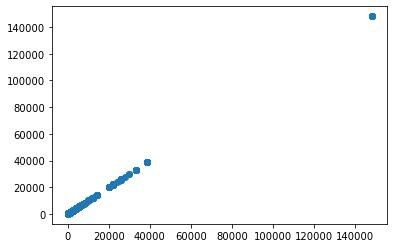

In [16]:
plt.scatter(x=data['reviews'],y=data['reviews']) #we check on a scattered plot to see if there are some outliers

In [17]:
data.max()

reviews    148114.0
dtype: float64

In [18]:
data.sort_values('reviews',ascending=False).head(10) #We can check there are 5 outliers from company Walmart.

,position,company,description,reviews,location
6828,Information Security Risk Expert,Walmart,Position Description\nCompany Summary: Walmart...,148114.0,"Sunnyvale, CA 94086"
6958,Senior Data Scientist (GEC11902),Walmart,Position Description\nProficient in Java or Py...,148114.0,"Sunnyvale, CA 94086"
6728,"Staff Software Engineer, Front End Lead",Walmart,Position Description\nPosition Summary\nAs a S...,148114.0,"Sunnyvale, CA 94086"
449,Data Scientist-ISD,Walmart,Position Description\n\nConsults with business...,148085.0,"Austin, TX 78716"
6668,Staff Data Scientist,Walmart,Position Description\n\nA Staff Data Scientist...,148051.0,"San Bruno, CA 94066"
177,"Associate Manager, Agile Paid Media",The Home Depot,"Position Purpose:\nPlan, manage and execute di...",38844.0,"Atlanta, GA"
172,Senior Business Intelligence Analyst,The Home Depot,A Sr Business Intelligence Analyst Supply Chai...,38844.0,"Atlanta, GA"
251,SR DATA ANALYST SUPPLY CHAIN,The Home Depot,POSITION PURPOSE:\nA Sr Data Analyst Supply Ch...,38844.0,"Atlanta, GA"
28,"Data Scientist, Online",The Home Depot,"Position Purpose:\nAt HomeDepot.com, our award...",38844.0,"Atlanta, GA"
74,DATA ANALYST SUPPLY CHAIN,The Home Depot,POSITION PURPOSE:\nA Data Analyst Supply Chain...,38844.0,"Atlanta, GA"


In [19]:
med=data['reviews'].median()
data['reviews']=data['reviews'].fillna(med)
nulls_data=pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_data=nulls_data.rename(columns={'index':'header',0:'prop_nulls'})
nulls_data # we replace the null valeus of numerical fields by the median

,prop_nulls
position,0.01
company,0.01
description,0.01
reviews,0.00
location,0.01


In [20]:
data['position']=data['position'].fillna("Unknown")
data['company']=data['company'].fillna("Unknown")
data['description']=data['description'].fillna("Unknown")
data['location']=data['location'].fillna("Unknown")  # we replace the null valeus of categorical fields by Unknown

In [21]:
data.isnull().values.any()

False

In [22]:
nulls_data=pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_data=nulls_data.rename(columns={'index':'header',0:'prop_nulls'})
nulls_data

,prop_nulls
position,0.0
company,0.0
description,0.0
reviews,0.0
location,0.0


In [53]:
data.isnull().sum()

position       0
company        0
description    0
reviews        0
location       0
dtype: int64

In [23]:
data

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,230.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",230.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",230.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


In [24]:
# import re
# for x in data['description']:
#     regex = re.compile('[^a-zA-Z0-9 -]')
#     data['description'] = regex.sub(' ', str(x))
# data[0]

In [38]:
# import re
# regex = re.compile('[^a-zA-Z0-9 -]')
# non_alphanum=regex.sub(' ', str(data['description']))
# # non_alphanum
# word = " ".join(re.findall("[a-zA-Z]+", non_alphanum))
# word

'development director nals therapy development job description n n the road that leads to acc growing company located in the atlanta ga are department program operationsposition locatio description nthe emory university department o are you data driven we at netapp believe in t pharmacyclics is committed to the development oath a subsidiary of verizon is a values led we are the bing core relevance team responsibl comcast s technology amp product organizatio Name description Length dtype object'

In [26]:
# data['description']=list(map(non_alphanum,data['description']))

In [27]:
for i in data.select_dtypes(include=object): ## all database categorical changed to lowercase to facilitate the queries
    data[i]=data[i].str.lower()

In [28]:
data

,position,company,description,reviews,location
0,development director,als tdi,development director\nals therapy development ...,230.0,"atlanta, ga 30301"
1,an ostentatiously-excitable principal research...,the hexagon lavish,"job description\n\n""the road that leads to acc...",230.0,"atlanta, ga"
2,data scientist,xpert staffing,"growing company located in the atlanta, ga are...",230.0,"atlanta, ga"
3,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303"
4,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,"atlanta, ga"
...,...,...,...,...,...
6959,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,"sunnyvale, ca"
6960,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca"
6961,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"sunnyvale, ca"
6962,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,"sunnyvale, ca"


In [58]:
data[(data['position'].str.contains('analyst')) | (data['position'].str.contains('scientist'))
       | (data['position'].str.contains('architecture')) | (data['position'].str.contains('sql')) 
         | (data['position'].str.contains('machine learning'))] 

# Data Scientist Data Analyst, Data Engineering, Machine Learning, Data Architecture, SQL, Computer Science, Python


,position,company,description,reviews,location
1,an ostentatiously-excitable principal research...,the hexagon lavish,"job description\n\n""the road that leads to acc...",230.0,"atlanta, ga"
2,data scientist,xpert staffing,"growing company located in the atlanta, ga are...",230.0,"atlanta, ga"
3,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303"
4,assistant professor -tt - signal processing & ...,emory university,description\nthe emory university department o...,550.0,"atlanta, ga"
7,"junior to mid-level engineer, geologist or env...",wood,overview / responsibilities\nwood environment ...,899.0,"atlanta, ga"
...,...,...,...,...,...
6959,data developer / machine learning analyst,netapp,are you data-driven? we at netapp believe in t...,574.0,"sunnyvale, ca"
6960,scientist i,"pharmacyclics, an abbvie company",pharmacyclics is committed to the development ...,26.0,"sunnyvale, ca"
6961,intern scientist,oath inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"sunnyvale, ca"
6962,senior data & applied scientist,microsoft,we are the bing core relevance team responsibl...,4618.0,"sunnyvale, ca"


In [ ]:
# cols=[]
# for i in range(len(mca.columns)):
#     cols.append(mca.columns[i].lower())
# mca.columns=cols
# mca.columns=mca.columns.str.replace(" ", "_")